In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from pandas import *
import csv 

In [2]:
def num_rows_and_cols(filename):
    cur_file = open(filename,newline='')
    raw_data = csv.reader(cur_file)
    num_rows = 0 
    num_cols = 0 
    is_num_cols_known = 0
    for rows in raw_data:
        if is_num_cols_known == 0:
            for element in rows:
                num_cols += 1
            is_num_cols_known = 1 
        num_rows += 1
    cur_file.close()
    return num_rows,num_cols


def read_file(filename):
    Y = [] 
    X = [] 
    num_rows,num_columns = num_rows_and_cols(filename)
    num_cities = num_columns-1 
    for i in range(1,num_cities+1): 
        empty_list = [];
        X.append(empty_list)
    with open(filename,newline='') as cur_file: 
        raw_data = csv.reader(cur_file)
        for rows in raw_data:
            Y.append(float(rows[0]))
            for i in range(1,num_cities+1):
                X[i-1].append(float(rows[i]))
    return X,Y



X,Y = read_file("data1.csv")
x1 = X
X,Y = read_file("data2.csv")
x2 = X
X,Y = read_file("data3.csv")
x3 = X
x_combined = np.vstack((x1,x2,x3))
power_alameda = x_combined[0]
power_sanmateo = x_combined[1]
power_losangeles = x_combined[2]
power_merced = x_combined[3]
power_santaclara = x_combined[4]
power_riverside = x_combined[5]
power_sandiego = x_combined[6]
power_santabarbara = x_combined[7]
power_santacruz = x_combined[8]
year = Y

In [3]:
def polynomial_regression(year, data_seq_1, degree):
    x = np.array(year)
    y = np.array(data_seq_1)
    coeff = np.polyfit(x,y,degree)
    plt.plot(x,np.polyval(coeff,x))
    plt.scatter(x,y,marker='^')
    plt.show()

Best fit polynomial for current city has degree 21 and corresponding optimal loss is 0.0053185534548214255


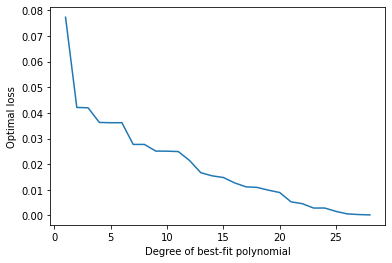

C:\Users\shour\AppData\Local\Temp/ipykernel_7068/766651269.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_regression(year, i, best_fit_poly_degree)


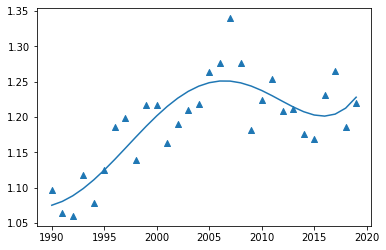

Best fit polynomial for current city has degree 19 and corresponding optimal loss is 0.0023602184475738958


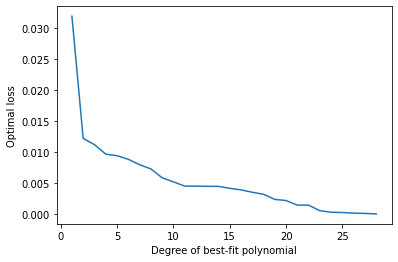

C:\Users\shour\AppData\Local\Temp/ipykernel_7068/766651269.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_regression(year, i, best_fit_poly_degree)


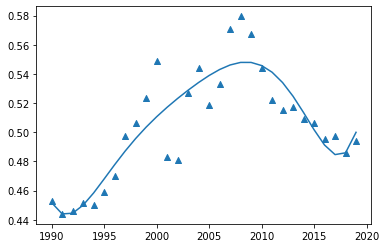

Best fit polynomial for current city has degree 11 and corresponding optimal loss is 0.15038846823285237


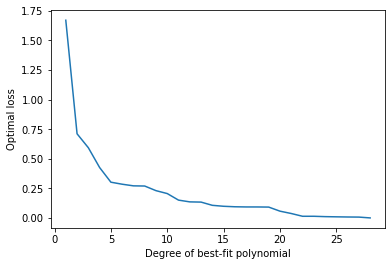

C:\Users\shour\AppData\Local\Temp/ipykernel_7068/766651269.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_regression(year, i, best_fit_poly_degree)


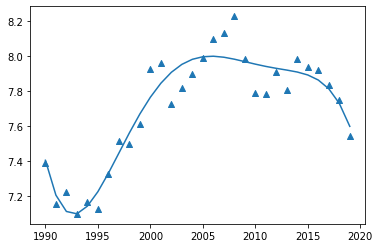

Best fit polynomial for current city has degree 26 and corresponding optimal loss is 0.002574538538367962


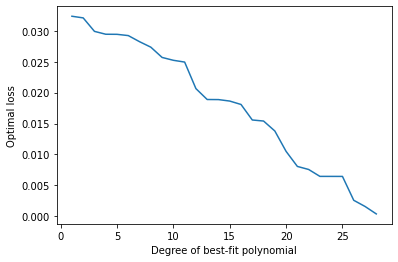

C:\Users\shour\AppData\Local\Temp/ipykernel_7068/766651269.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_regression(year, i, best_fit_poly_degree)


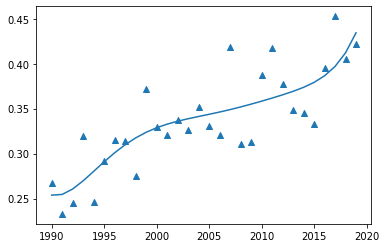

Best fit polynomial for current city has degree 18 and corresponding optimal loss is 0.00978828057347137


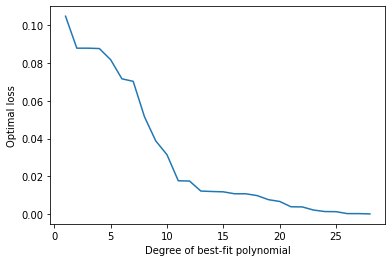

C:\Users\shour\AppData\Local\Temp/ipykernel_7068/766651269.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_regression(year, i, best_fit_poly_degree)


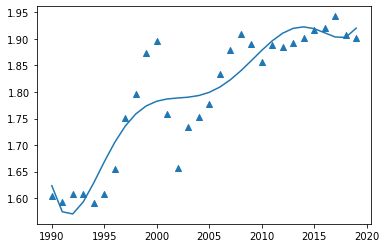

Best fit polynomial for current city has degree 21 and corresponding optimal loss is 0.024946280953340668


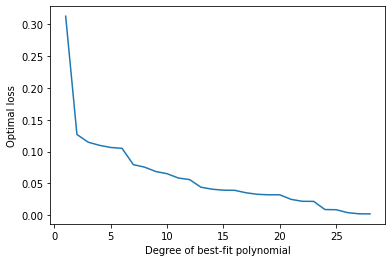

C:\Users\shour\AppData\Local\Temp/ipykernel_7068/766651269.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_regression(year, i, best_fit_poly_degree)


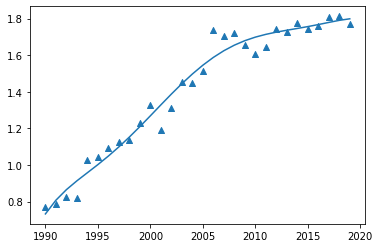

Best fit polynomial for current city has degree 16 and corresponding optimal loss is 0.022625994058689994


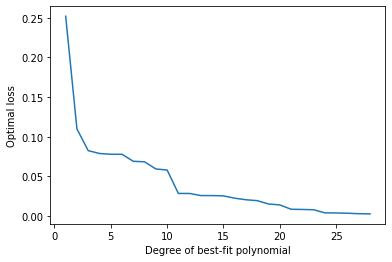

C:\Users\shour\AppData\Local\Temp/ipykernel_7068/766651269.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_regression(year, i, best_fit_poly_degree)


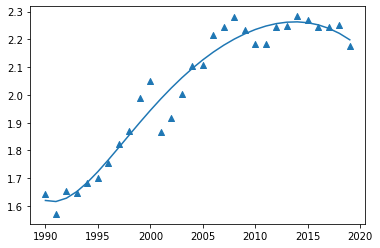

Best fit polynomial for current city has degree 10 and corresponding optimal loss is 0.0013342366140204024


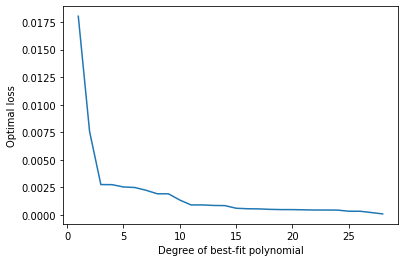

C:\Users\shour\AppData\Local\Temp/ipykernel_7068/766651269.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_regression(year, i, best_fit_poly_degree)


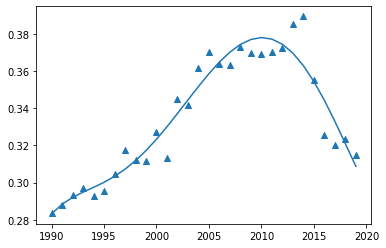

Best fit polynomial for current city has degree 13 and corresponding optimal loss is 0.00021491678604745017


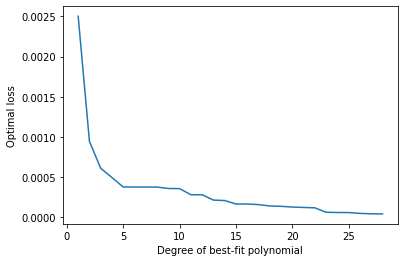

C:\Users\shour\AppData\Local\Temp/ipykernel_7068/766651269.py:22: RankWarning: Polyfit may be poorly conditioned
  polynomial_regression(year, i, best_fit_poly_degree)


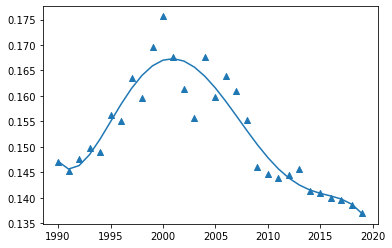

In [4]:
for i in x_combined:
    deg = np.array(range(1, len(year)-1))
    optimal_loss_all_degs = []
    best_fit_poly_found = 0 
    best_fit_poly_degree = 0
    for j in deg:
        best_fit_optimal_loss = 0 
        poly,extra_data = np.polynomial.polynomial.Polynomial.fit(year, i, j, full=True)
        optimal_loss = extra_data[0][0]
        optimal_loss_all_degs.append(optimal_loss)
        if j == 1:
            optimal_loss_degree_one = optimal_loss 
        if j > 1 and optimal_loss <= 0.1*optimal_loss_degree_one and best_fit_poly_found == 0:
            best_fit_poly_degree = j
            best_fit_optimal_loss = optimal_loss
            best_fit_poly_found = 1 
            print("Best fit polynomial for current city has degree "+str(best_fit_poly_degree)+" and corresponding optimal loss is "+str(best_fit_optimal_loss))
    plt.plot(deg, optimal_loss_all_degs)
    plt.xlabel("Degree of best-fit polynomial")
    plt.ylabel("Optimal loss")
    plt.show()
    polynomial_regression(year, i, best_fit_poly_degree)